In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
import pandas as pd
import numpy as np
from scipy import stats
import networkx as nx
from scipy.stats import poisson
from scipy.stats import nbinom
from timeit import default_timer as timer
from plotly.subplots import make_subplots
import math

In [2]:
def plot_sub(plots):
  fig = make_subplots(rows=2, cols=2, subplot_titles=("r = 0.5", "r = 1", "r = 2", "r = 1000"),
                    specs=[[{"type": "scatter"}, {"type": "scatter"}], [{"type": "scatter"},
                           {"type": "scatter"}]])

  for i, subplot_fig in enumerate(plots, start=1):
      show_legend = True if i == 1 else False
      for trace in subplot_fig.data:
          trace.showlegend = show_legend
          fig.add_trace(trace, row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)

  # Ajustando o layout
  fig.update_layout(height=800, width=1000, title_text="Suscetibilidade em redes Configuration Model com parâmetro r variando")

  # Exibindo o gráfico
  fig.show()

  return

In [42]:
dados = np.loadtxt("data/dados_QS_500iter.txt", skiprows=1)
lamb = dados[:, 0]
med_susce = dados[:, 1]

temp = np.loadtxt("data/dados_1000_QS500_0.txt",skiprows=1)
aux0 = (temp[:,1])

In [43]:
aux_sus = []
for i in range(30):
    aux = np.loadtxt(f"data/dados_1000_QS500_{i}_para.txt",skiprows=1)
    aux_sus.append(aux[:,1])
    aux = np.loadtxt(f"data/dados_1000_QS500_{i}_para_2.txt",skiprows=1)
    aux_sus.append(aux[:,1])
    aux = np.loadtxt(f"data/dados_1000_QS500_{i}_para_3.txt",skiprows=1)
    aux_sus.append(aux[:,1])

In [44]:
aux_sus_arr = np.array(aux_sus) 
media = np.mean(aux_sus_arr, axis=0)
med_susce = (aux0 + med_susce + media) / 3

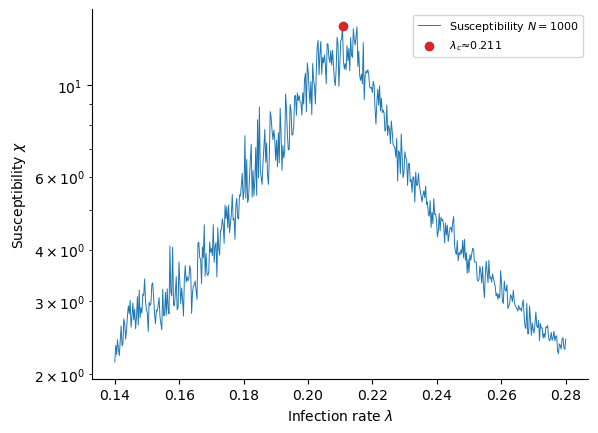

In [50]:
plt.plot(lamb,med_susce, label=r'Susceptibility $N = 1000$', color='C0',linewidth=0.7)
max_idx = np.argmax(med_susce)
x_max = lamb[max_idx]
y_max = med_susce[max_idx]

plt.scatter(x_max, y_max, color='C3', zorder=5, label=f'$λ_c ≈ {x_max:.3f}$')  # destaca o ponto máximo


#plt.plot(lamb104,med_susce104, label='Susceptible N = 10000', color='red')
plt.ylabel(r"Susceptibility $\chi$")
plt.xlabel(r"Infection rate $\lambda$" )
plt.yscale('log')

# Remove a borda superior (spine top)
ax = plt.gca()  # pega os eixos atuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  # direita
plt.legend(fontsize=8)  # ← menor legenda
#plt.ylim(0, 10**-4)
#plt.legend()
plt.show()

In [46]:
# Ajustando o modelo aos dados# Definindo um modelo polinomial de grau 5
def poly_model(x, a, b, c, d, e, f, g):
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

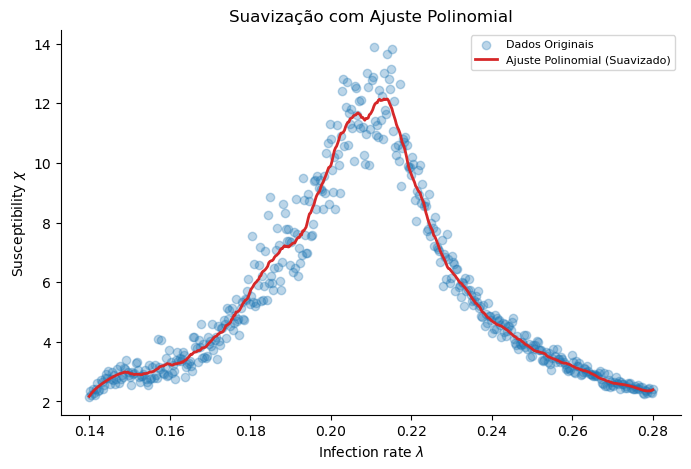

In [52]:
from scipy.optimize import curve_fit

from scipy.signal import savgol_filter

y_smooth = savgol_filter(med_susce, window_length=60, polyorder=5)

params, _ = curve_fit(poly_model, lamb, med_susce)

# Gerando a curva suavizada
x_fit = np.linspace(min(lamb), max(lamb), 500)
y_fit = poly_model(x_fit, *params)

# Plotando os gráficos
plt.figure(figsize=(8, 5))
plt.scatter(lamb, med_susce, label='Dados Originais', alpha=0.3)
plt.plot(lamb, y_smooth, label='Ajuste Polinomial (Suavizado)', color='C3', linewidth=2)
plt.xlabel(r"Infection rate $\lambda$")
plt.ylabel(r"Susceptibility $\chi$")
#plt.ylim(1*(10**-5),3*(10**-5))
ax = plt.gca()  # pega os eixos atuais
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  # direita
plt.legend(fontsize=8)  # ← menor legenda

plt.title('Suavização com Ajuste Polinomial')
plt.show()

In [75]:
def plot_susceptibility(lamb, med_susce, line_color, point_color, r, i=2, ax=None):

    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(lamb, med_susce, label=r'Susceptibility $N = 1000$', color=line_color, linewidth=0.7)
    
    max_idx = np.argmax(med_susce)
    x_max = lamb[max_idx]
    y_max = med_susce[max_idx]
    ax.scatter(x_max, y_max, color=point_color, zorder=5, label=fr'$\lambda_c \approx {x_max:.3f}$')

    if i == 0 or i == 2:
        ax.set_ylabel(r"Susceptibility $\chi$")
    if i == 2 or i == 3:
        ax.set_xlabel(r"Infection rate $\lambda$")
    ax.set_yscale('log')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(fr'$r$ = {r}')
    #ax.legend(fontsize=8)

    return ax


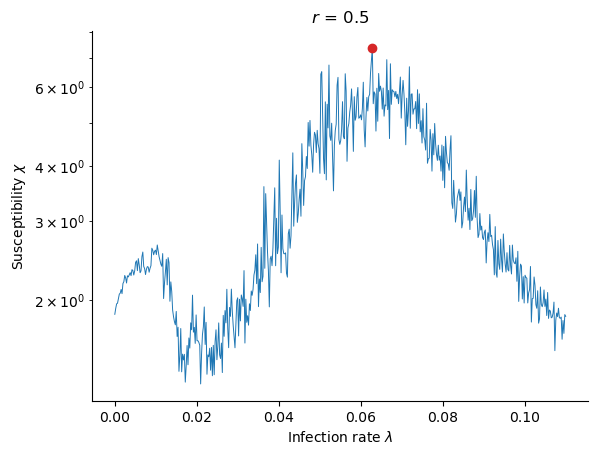

In [76]:
dados_config = np.loadtxt("data/dados_1000_QS500_config_r05.txt", skiprows=1)

fig05 = plot_susceptibility(dados_config[:,0], dados_config[:,1], 'C0','C3',0.5)

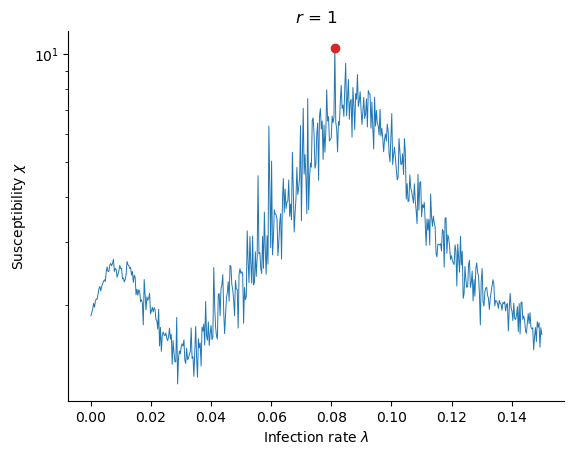

In [62]:
dados_config = np.loadtxt("data/dados_1000_QS500_config_r1.txt", skiprows=1)

fig1 = plot_susceptibility(dados_config[:,0], dados_config[:,1], 'C0','C3',1)

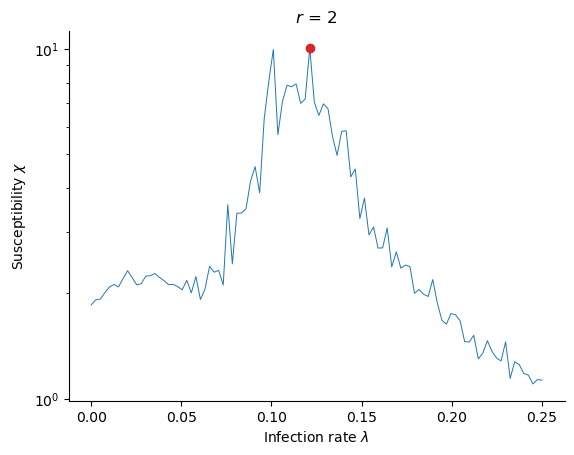

In [63]:
dados_config = np.loadtxt("data/dados_1000_QS100_config_r2.txt", skiprows=1)

fig2 = plot_susceptibility(dados_config[:,0], dados_config[:,1], 'C0','C3',2)

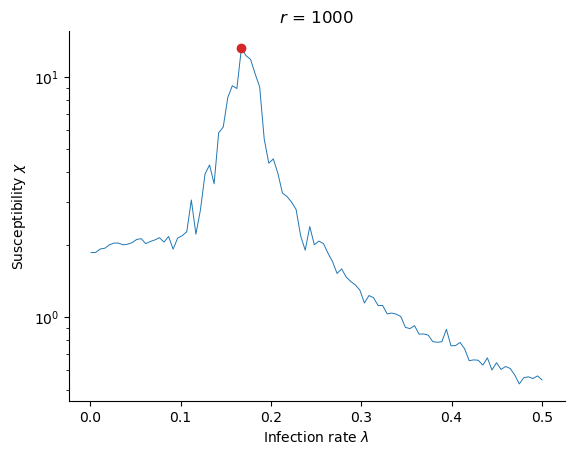

In [64]:
dados_config = np.loadtxt("data/dados_1000_QS100_config_r1000.txt", skiprows=1)

fig1000 = plot_susceptibility(dados_config[:,0], dados_config[:,1], 'C0','C3',1000)

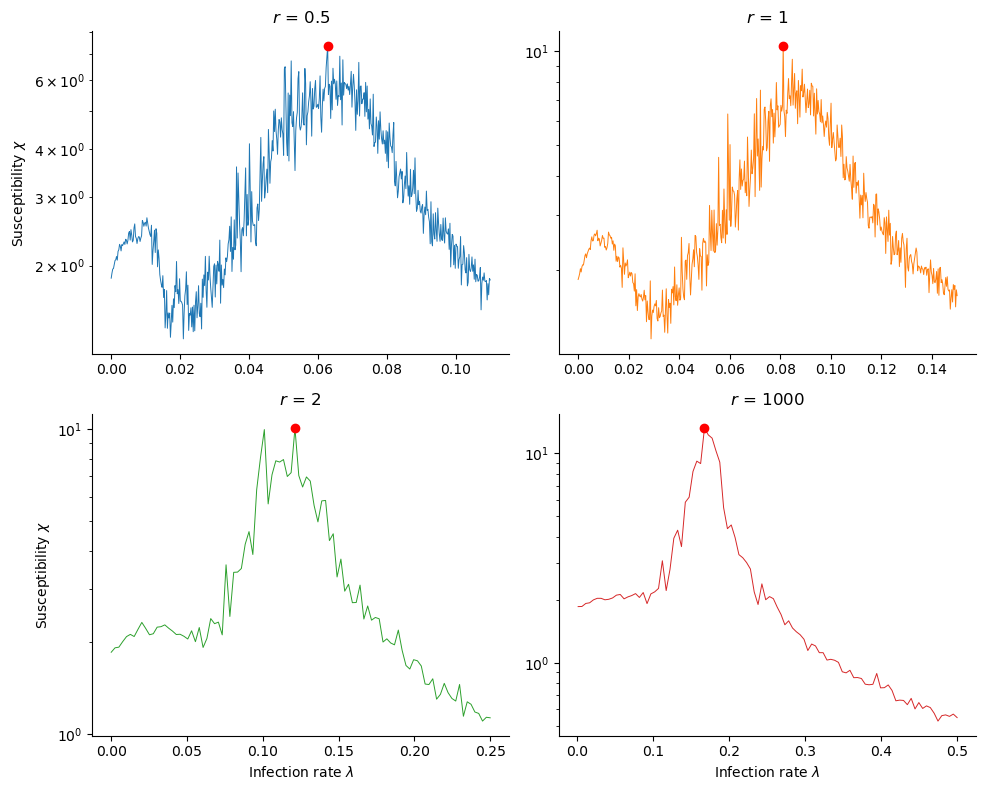

In [77]:
arquivos = [
    "data/dados_1000_QS500_config_r05.txt",
    "data/dados_1000_QS500_config_r1.txt",
    "data/dados_1000_QS100_config_r2.txt",
    "data/dados_1000_QS100_config_r1000.txt"
]

cores = ['C0', 'C1', 'C2', 'C3']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()
r = [0.5,1,2,1000]

for i, (arq, cor) in enumerate(zip(arquivos, cores)):
    dados = np.loadtxt(arq, skiprows=1)
    lamb = dados[:, 0]
    susc = dados[:, 1]
    plot_susceptibility(lamb, susc, cor, 'red',r[i], i, ax=axs[i])

plt.tight_layout()
plt.savefig("suscetibilidade_subplot.png", dpi=300)
plt.show()

In [ ]:
#colocar porcentagem de infectados como 10%
#mais repetições com o método qs
#dar uma olhada no artigo do wesley
#r = 0.5, 1, 2, 1000
#r = 1, range(0.01 até 0.15)
#r = 1000, range(0 até 0.3)
#r = 2, range(0 até 0.25)